In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install neurokit2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 2.1 MB/s 


In [5]:
%cd /content/gdrive/MyDrive/collab/tumai/newanalysis

/content/gdrive/MyDrive/collab/tumai/newanalysis


In [6]:
ls

 A0KX894_hr.csv   analysis_sick_person_A4E0D03_hr.ipynb
 A0L9BM2_hr.csv  'Copy of analysis_sick_person_Akxn5ZZ_hr.ipynb'
 A0N9NV4_hr.csv  'Copy of Copy of analysis_sick_person_Akxn5ZZ_hr.ipynb'
 A0NVTRV_hr.csv   data_treated_A0KX894_quality_0.871367814362184.csv
 A0VFT1N_hr.csv   data_treated_A0N9NV4_quality_0.8315445065359504.csv
 A1K5DRI_hr.csv   data_treated_A4E0D03_quality_0.662608422280227_10000khz.csv
 A2D7K4A_hr.csv   data_treated_AKXN5ZZ_quality_0.8271026088591573_10000khz.csv
 A4E0D03_hr.csv   notebook_autoanalysis_not_coronaindiv.ipynb
 AAXAA7Z_hr.csv   preprocessed_signal.csv
 AKXN5ZZ_hr.csv


In [8]:
import neurokit2 as nk
import pandas as pd

In [9]:
data= pd.read_csv("AAXAA7Z_hr.csv")
len(data)

624671

In [11]:
data.head()

,user,datetime,heartrate
0,AAXAA7Z,2023-02-18 00:00:08,62
1,AAXAA7Z,2023-02-18 00:00:18,61
2,AAXAA7Z,2023-02-18 00:00:33,61
3,AAXAA7Z,2023-02-18 00:00:38,62
4,AAXAA7Z,2023-02-18 00:00:53,63


In [12]:
time_np=data['datetime'].values
user_np=data['user'].values

In [13]:
import neurokit2 as nk
import pandas as pd




In [14]:
signals, info = nk.ecg_process(data["heartrate"], sampling_rate=1000)
# set to 10k for better visualization

In [15]:
type(signals)

pandas.core.frame.DataFrame

In [16]:
signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,62,-0.508286,79.095555,0.950025,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,61,-0.511108,79.095555,0.950025,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,61,-0.511431,79.095555,0.950025,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,62,-0.511752,79.095555,0.950025,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,63,-0.512074,79.095555,0.950025,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624666,68,0.234687,115.163148,0.991928,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
624667,72,0.156049,115.163148,0.991928,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
624668,69,0.052389,115.163148,0.991928,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
624669,68,-0.061286,115.163148,0.991928,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


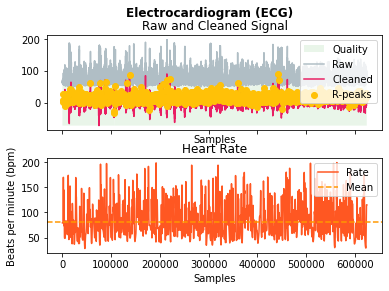

In [17]:
nk.ecg_plot(signals) 

In [18]:
signals_t=signals[["ECG_Raw","ECG_Clean","ECG_Rate","ECG_Quality","ECG_R_Peaks"]]

In [19]:
signals_t.head()

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks
0,62,-0.508286,79.095555,0.950025,0
1,61,-0.511108,79.095555,0.950025,0
2,61,-0.511431,79.095555,0.950025,0
3,62,-0.511752,79.095555,0.950025,0
4,63,-0.512074,79.095555,0.950025,0


In [20]:
signals_t['datetime']= time_np
signals_t['user']= user_np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
signals_t.head()

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,datetime,user
0,62,-0.508286,79.095555,0.950025,0,2023-02-18 00:00:08,AAXAA7Z
1,61,-0.511108,79.095555,0.950025,0,2023-02-18 00:00:18,AAXAA7Z
2,61,-0.511431,79.095555,0.950025,0,2023-02-18 00:00:33,AAXAA7Z
3,62,-0.511752,79.095555,0.950025,0,2023-02-18 00:00:38,AAXAA7Z
4,63,-0.512074,79.095555,0.950025,0,2023-02-18 00:00:53,AAXAA7Z


In [22]:
len(signals_t)

624671

In [23]:
signals_t['ECG_Quality'].nsmallest()

106348   -0.145289
106349   -0.145287
106347   -0.145283
106350   -0.145280
106346   -0.145271
Name: ECG_Quality, dtype: float64

In [24]:
mean=signals_t['ECG_Quality'].mean()

In [25]:
print(mean)

0.9017821078686461


In [30]:
signals_t[(signals_t['ECG_Quality']<0.5)& (signals_t['ECG_Clean']<0)& (signals_t['ECG_R_Peaks']==1)]

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,datetime,user
106139,96,-33.706170,136.986301,6.938894e-17,1,2023-02-28 10:02:39,AAXAA7Z
106931,92,-3.634290,75.757576,3.821909e-01,1,2023-02-28 11:50:33,AAXAA7Z
215248,68,-12.001459,112.149533,2.684587e-01,1,2023-03-10 23:40:04,AAXAA7Z
450544,82,-19.845537,56.550424,2.042368e-01,1,2023-04-02 09:16:09,AAXAA7Z


In [27]:
name=f"data_treated_{user_np[0]}_quality_{mean}_10000khz.csv"

In [28]:
signals_t.to_csv(name)